# TEST & VISUALISATION PART
## 1- Test

In [ ]:
import torch
import torch.nn as nn

import time
from model import Net
from dataset import getDataTest
from calculateTime import epoch_time

from evaluation import evaluate


# load the model
model = Net()
model.load_state_dict(torch.load('./output/model.pt'))

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model = model.cuda()

# how many samples per batch to load
batch_size = 64
#data directory
data_dir = './../../data_manifast'
# get the test data
test_loader = getDataTest(data_dir,batch_size)

criterion =  nn.NLLLoss()
if train_on_gpu:
    criterion = criterion.cuda()

test_start_time = time.monotonic() # save the start time
test_loss, test_acc = evaluate(model, test_loader, criterion)
test_end_time = time.monotonic() # save the end time

# claculate the total time of the test
test_mins, test_secs = epoch_time(test_start_time, test_end_time)

## save the result to csv

In [ ]:
from csvFile import csvTest

# save the result of the test to a csv file
row = [len(test_loader.dataset), test_mins, test_secs, test_loss, test_acc]
csvTest(row)

# print the resultof the test
print(f'Test set size: {len(test_loader.dataset)} | Test Time: {test_mins}m {test_secs}s')
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

## 2- Visualisation

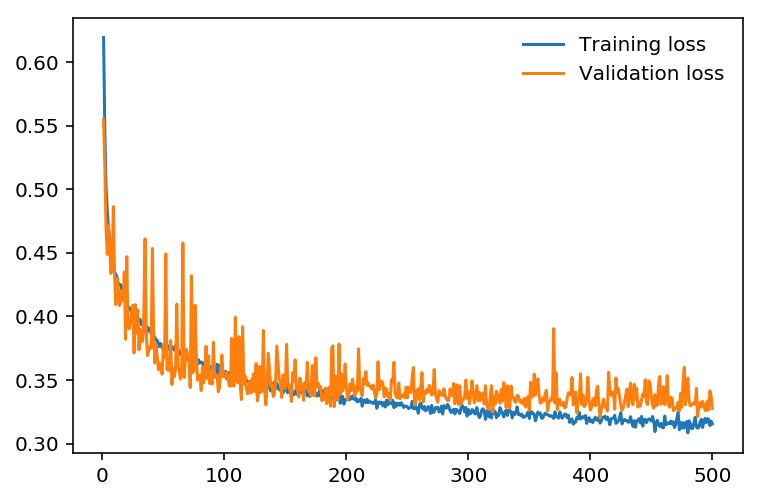

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./output/training.csv')

#data = data[:2].astype(int)
data = data.astype(float) 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(data['Epoch'],data['Train Loss'], label='Training loss')
plt.plot(data['Epoch'],data['Val Loss'], label='Validation loss')
plt.legend(frameon=False)

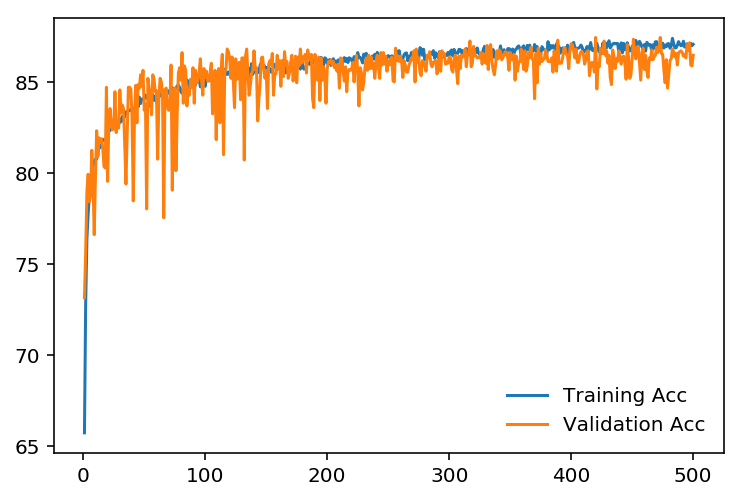

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(data['Epoch'],data['Train Acc'], label='Training Acc')
plt.plot(data['Epoch'],data['Val Acc'], label='Validation Acc')
plt.legend(frameon=False)